In [2]:
#!pip install mne
import mne
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
from scipy import signal, interpolate
from matplotlib.pyplot import figure

## Построение графиков ЭКГ с конечностей

In [7]:
path = r'C:\Users\Pasha\Desktop\Мага БМТ1\4 term\КП Бойко\Графики ЭКГ'
file_list = os.listdir(path)
file_list

['RefCurve_2023-04-25_0_160317.Wfm.csv',
 'RefCurve_2023-04-25_0_161959.Wfm.csv',
 'RefCurve_2023-04-25_1_162225.Wfm.csv',
 'RefCurve_2023-04-25_2_163122.Wfm.csv',
 'RefCurve_2023-04-25_3_163338.Wfm.csv',
 'RefCurve_2023-04-25_4_165700.Wfm.csv',
 'RefCurve_2023-04-25_5_165807.Wfm.csv',
 'RefCurve_2023-04-25_6_170639.Wfm.csv',
 'RefCurve_2023-04-25_7_170743.Wfm.csv',
 'RefCurve_2023-04-25_8_170855.Wfm.csv']

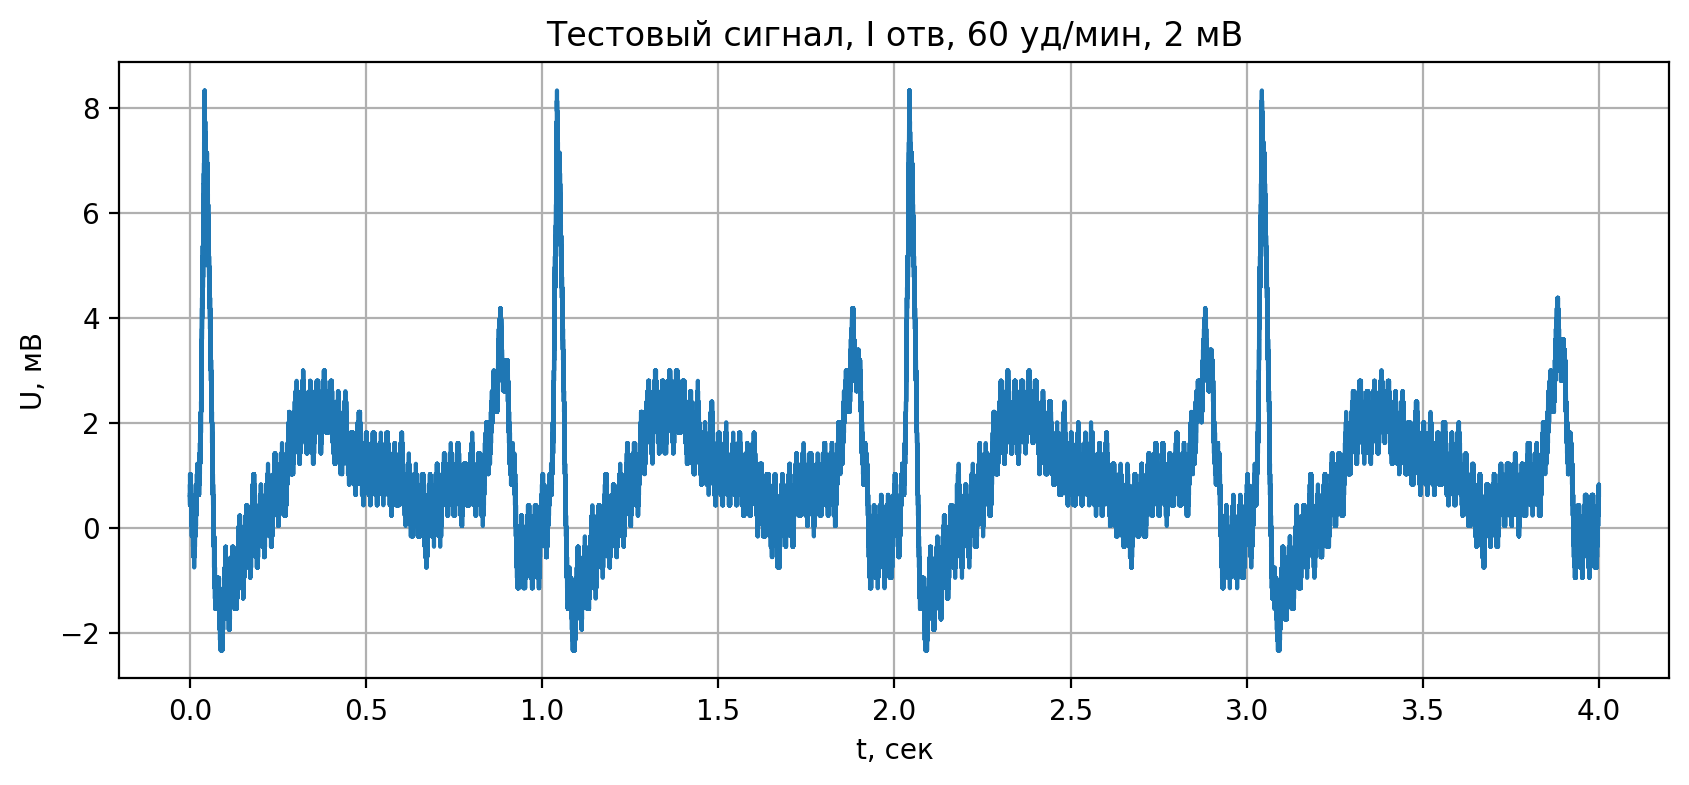

In [8]:
a = pd.read_csv(os.path.join(path, file_list[0]))
dT=4*10**(-6)
b=list(range(len(a)))
t=map(lambda x: x*dT, b)
plt.figure(figsize=(10, 4), dpi=200)
plt.plot(list(t), a)
plt.title('Тестовый сигнал, I отв, 60 уд/мин, 2 мВ')  
plt.xlabel('t, сек')
plt.ylabel('U, мВ')
plt.grid()

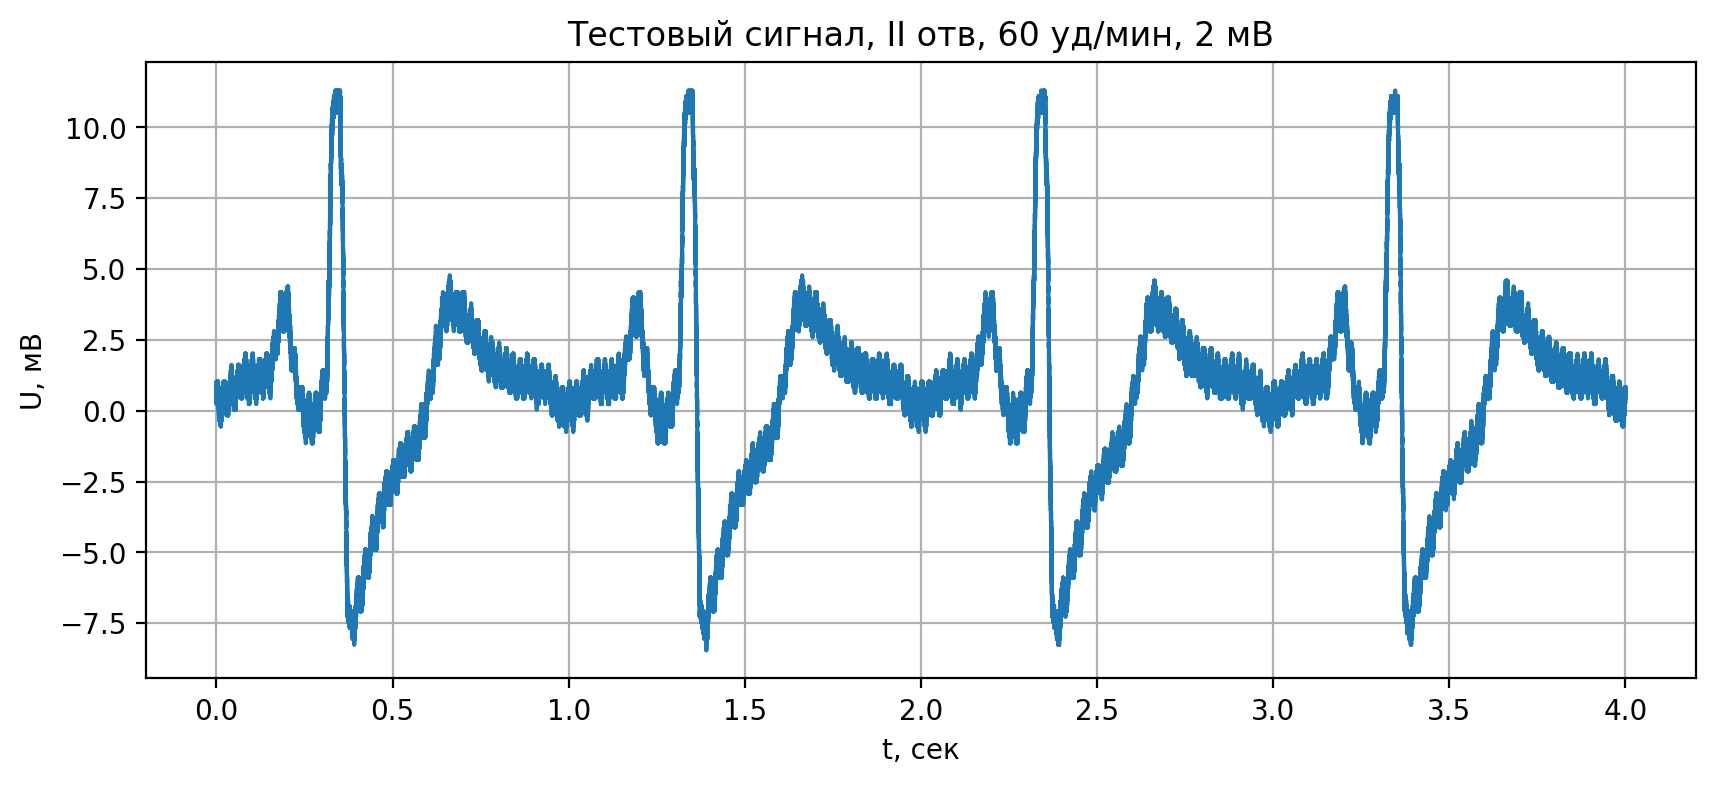

In [9]:
a = pd.read_csv(os.path.join(path, file_list[2]))
dT=4*10**(-6)
b=list(range(len(a)))
t=map(lambda x: x*dT, b)
plt.figure(figsize=(10, 4), dpi=200)
plt.plot(list(t), a)
plt.title('Тестовый сигнал, II отв, 60 уд/мин, 2 мВ')  
plt.xlabel('t, сек')
plt.ylabel('U, мВ')
plt.grid()

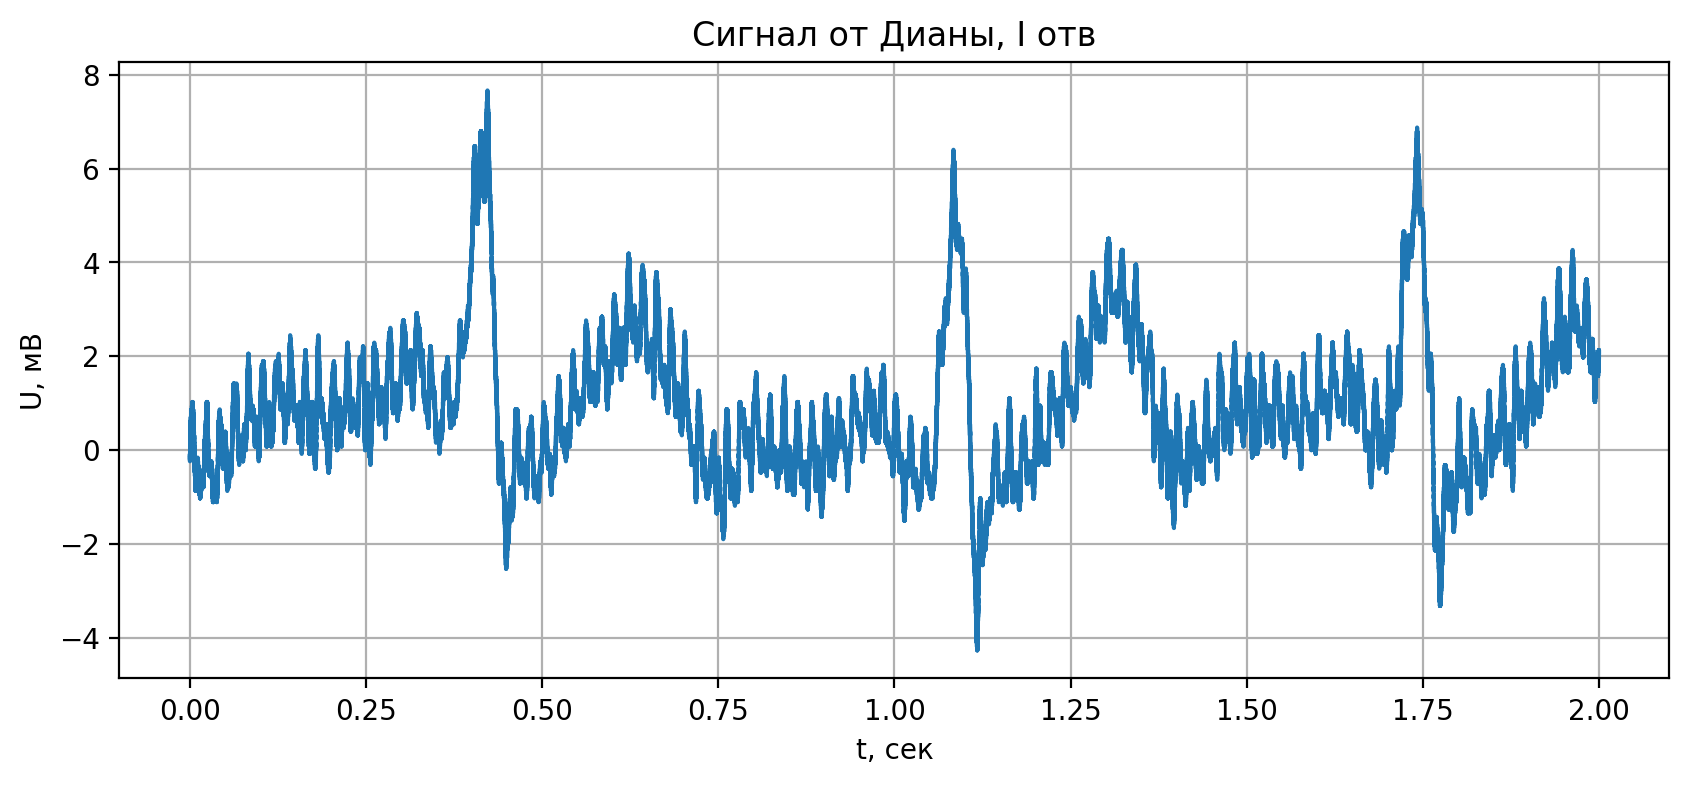

In [10]:
a = pd.read_csv(os.path.join(path, file_list[3]))
dT=2*10**(-6)
b=list(range(len(a)))
t=map(lambda x: x*dT, b)
plt.figure(figsize=(10, 4), dpi=200)
plt.plot(list(t), a)
plt.title('Cигнал от Дианы, I отв')  
plt.xlabel('t, сек')
plt.ylabel('U, мВ')
plt.grid()

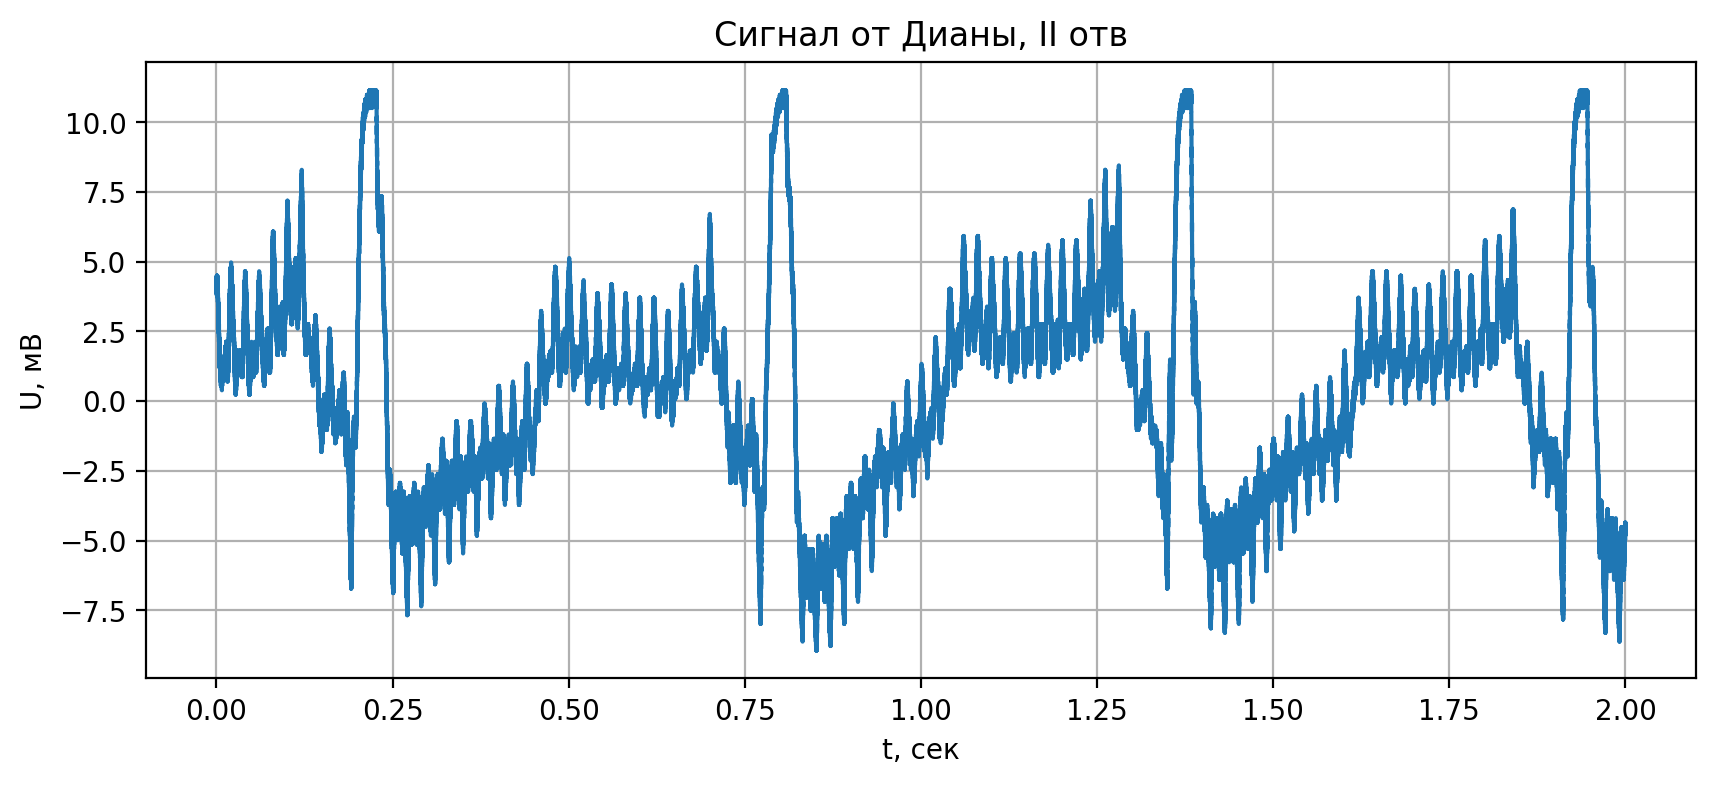

In [11]:
a = pd.read_csv(os.path.join(path, file_list[4]))
dT=2*10**(-6)
b=list(range(len(a)))
t=map(lambda x: x*dT, b)
plt.figure(figsize=(10, 4), dpi=200)
plt.plot(list(t), a)
plt.title('Cигнал от Дианы, II отв')
plt.xlabel('t, сек')
plt.ylabel('U, мВ')
plt.grid()

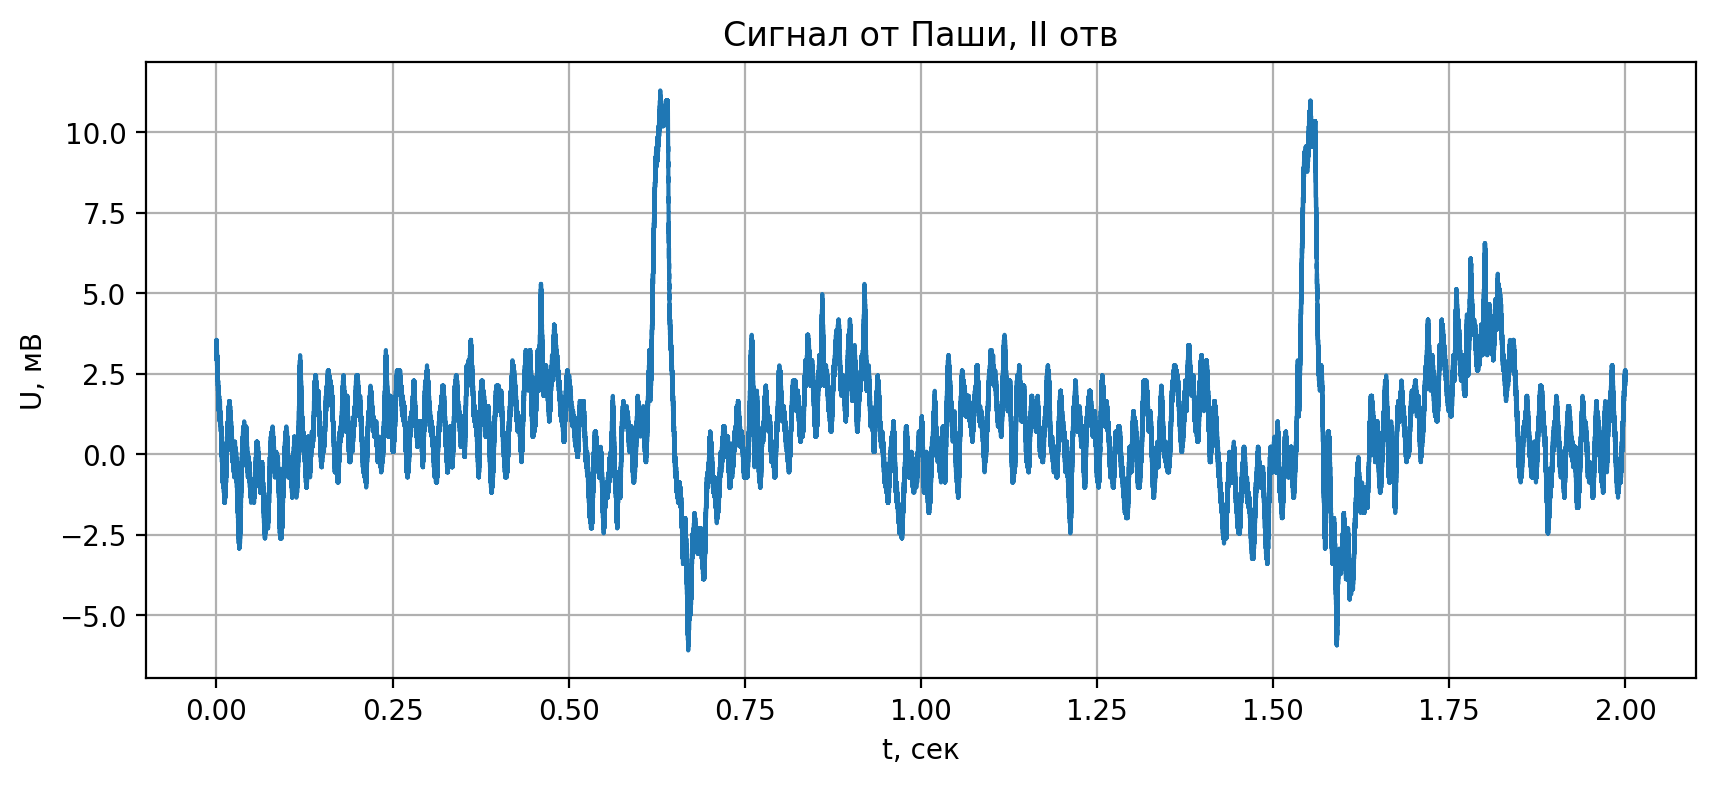

In [12]:
a = pd.read_csv(os.path.join(path, file_list[5]))
dT=2*10**(-6)
b=list(range(len(a)))
t=map(lambda x: x*dT, b)
plt.figure(figsize=(10, 4), dpi=200)
plt.plot(list(t), a)
plt.title('Сигнал от Паши, II отв')  
plt.xlabel('t, сек')
plt.ylabel('U, мВ')
plt.grid()

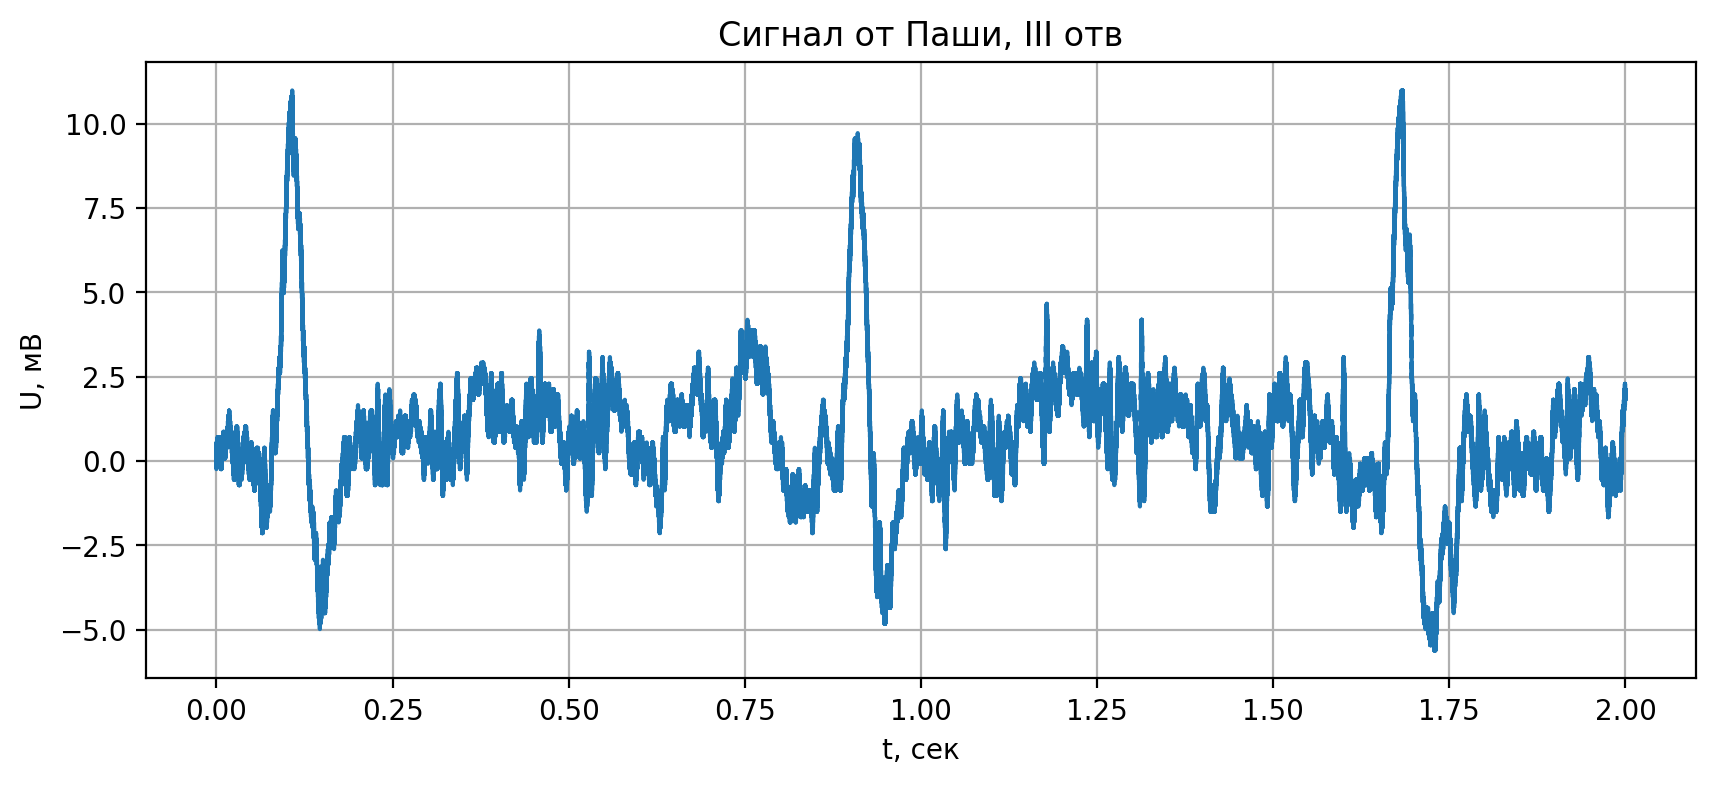

In [13]:
a = pd.read_csv(os.path.join(path, file_list[6]))
dT=2*10**(-6)
b=list(range(len(a)))
t=map(lambda x: x*dT, b)
plt.figure(figsize=(10, 4), dpi=200)
plt.plot(list(t), a)
plt.title('Сигнал от Паши, III отв')  
plt.xlabel('t, сек')
plt.ylabel('U, мВ')
plt.grid()

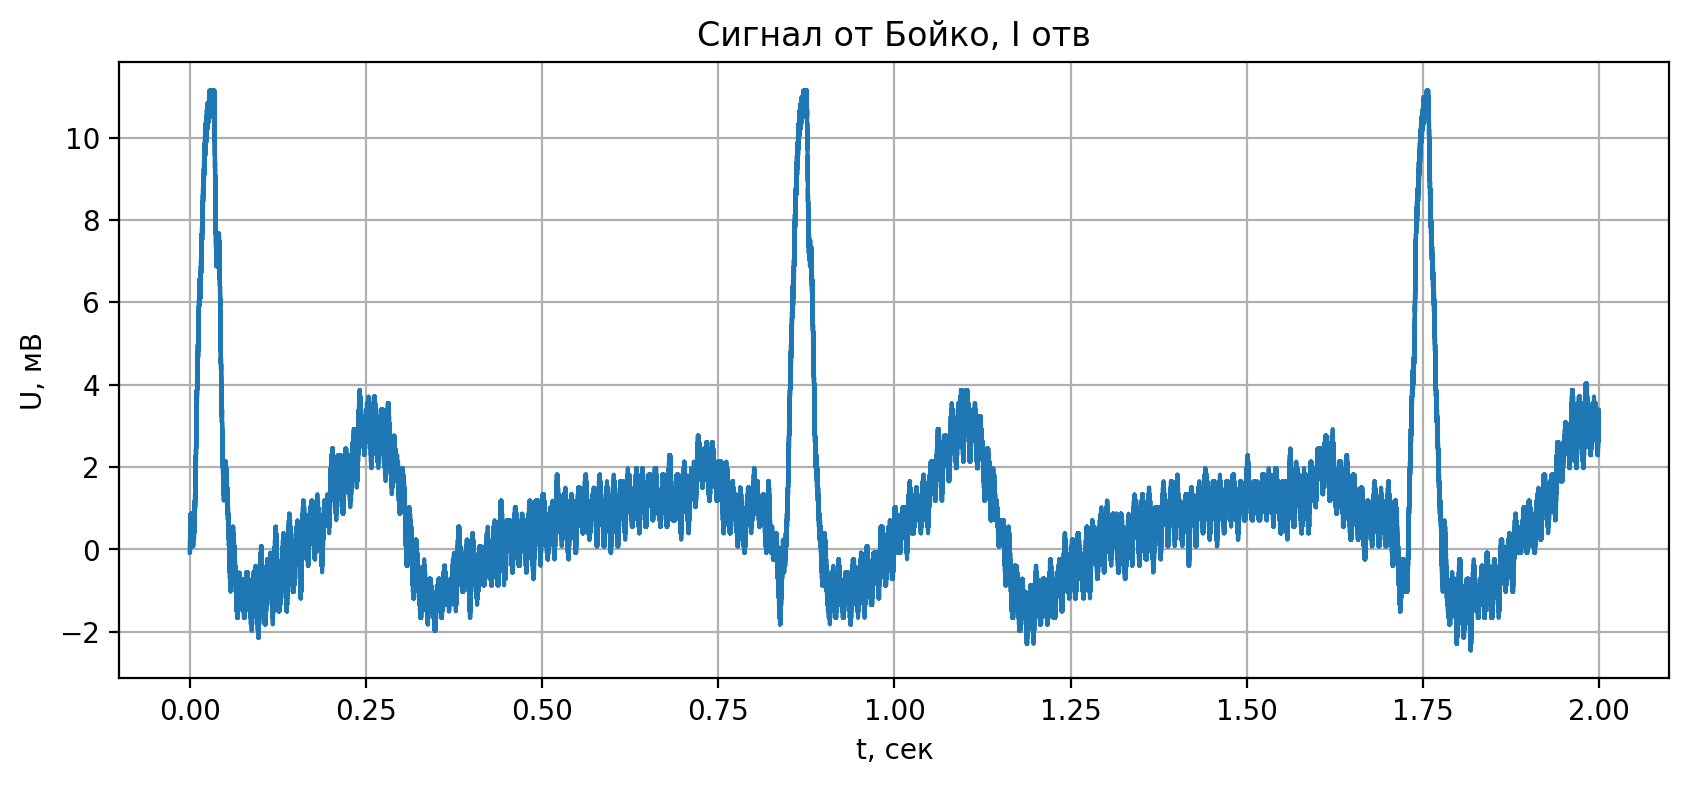

In [14]:
a = pd.read_csv(os.path.join(path, file_list[7]))
dT=2*10**(-6)
b=list(range(len(a)))
t=map(lambda x: x*dT, b)
plt.figure(figsize=(10, 4), dpi=200)
plt.plot(list(t), a)
plt.title('Сигнал от Бойко, I отв')   
plt.xlabel('t, сек')
plt.ylabel('U, мВ')
plt.grid()

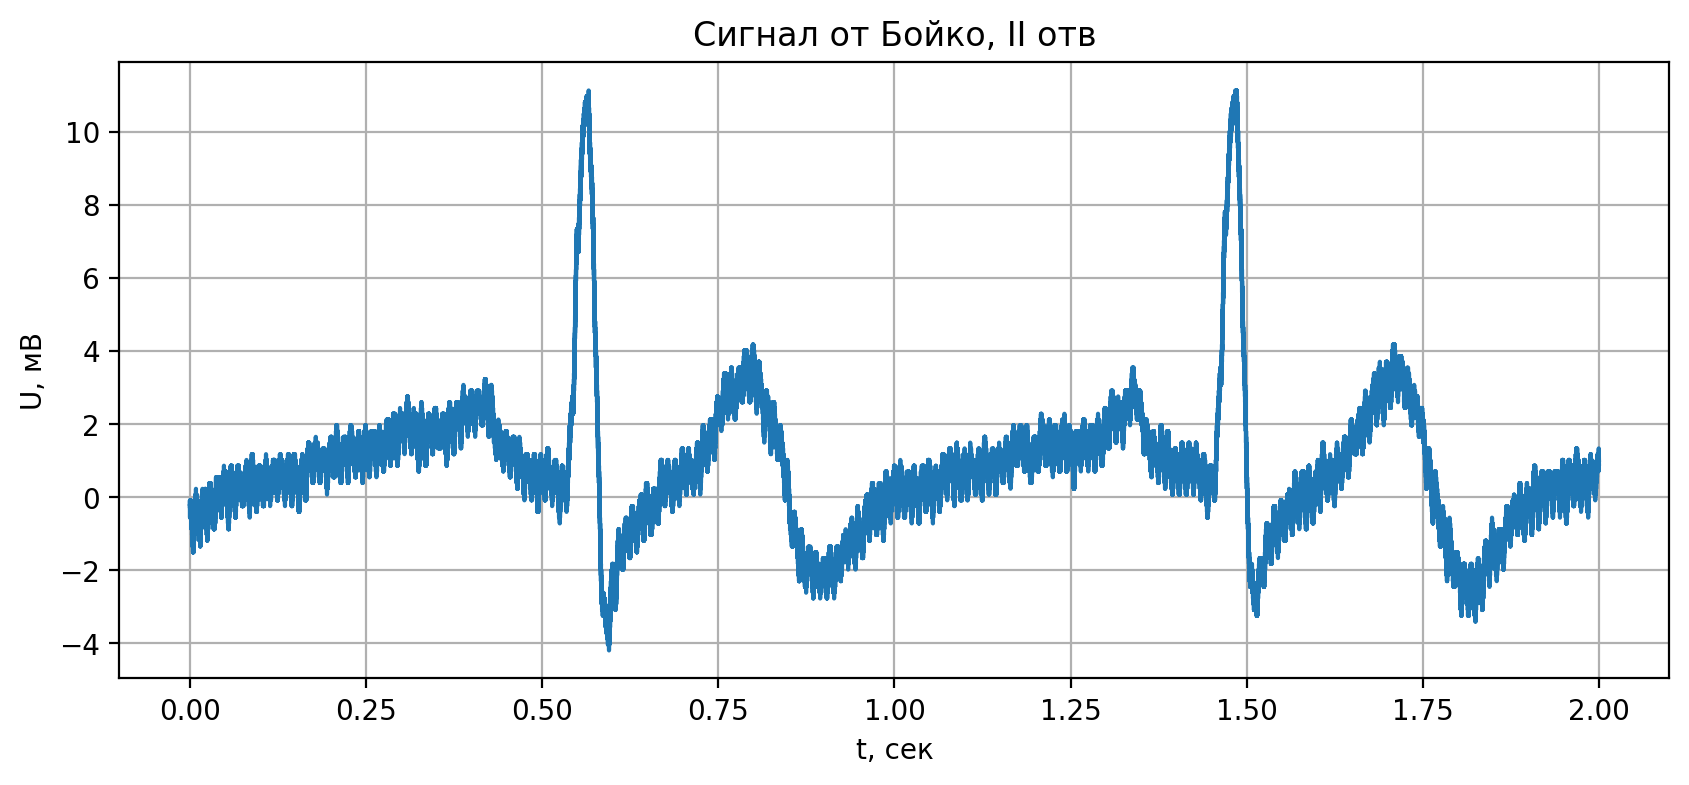

In [15]:
a = pd.read_csv(os.path.join(path, file_list[8]))
dT=2*10**(-6)
b=list(range(len(a)))
t=map(lambda x: x*dT, b)
plt.figure(figsize=(10, 4), dpi=200)
plt.plot(list(t), a)
plt.title('Сигнал от Бойко, II отв')    
plt.xlabel('t, сек')
plt.ylabel('U, мВ')
plt.grid()

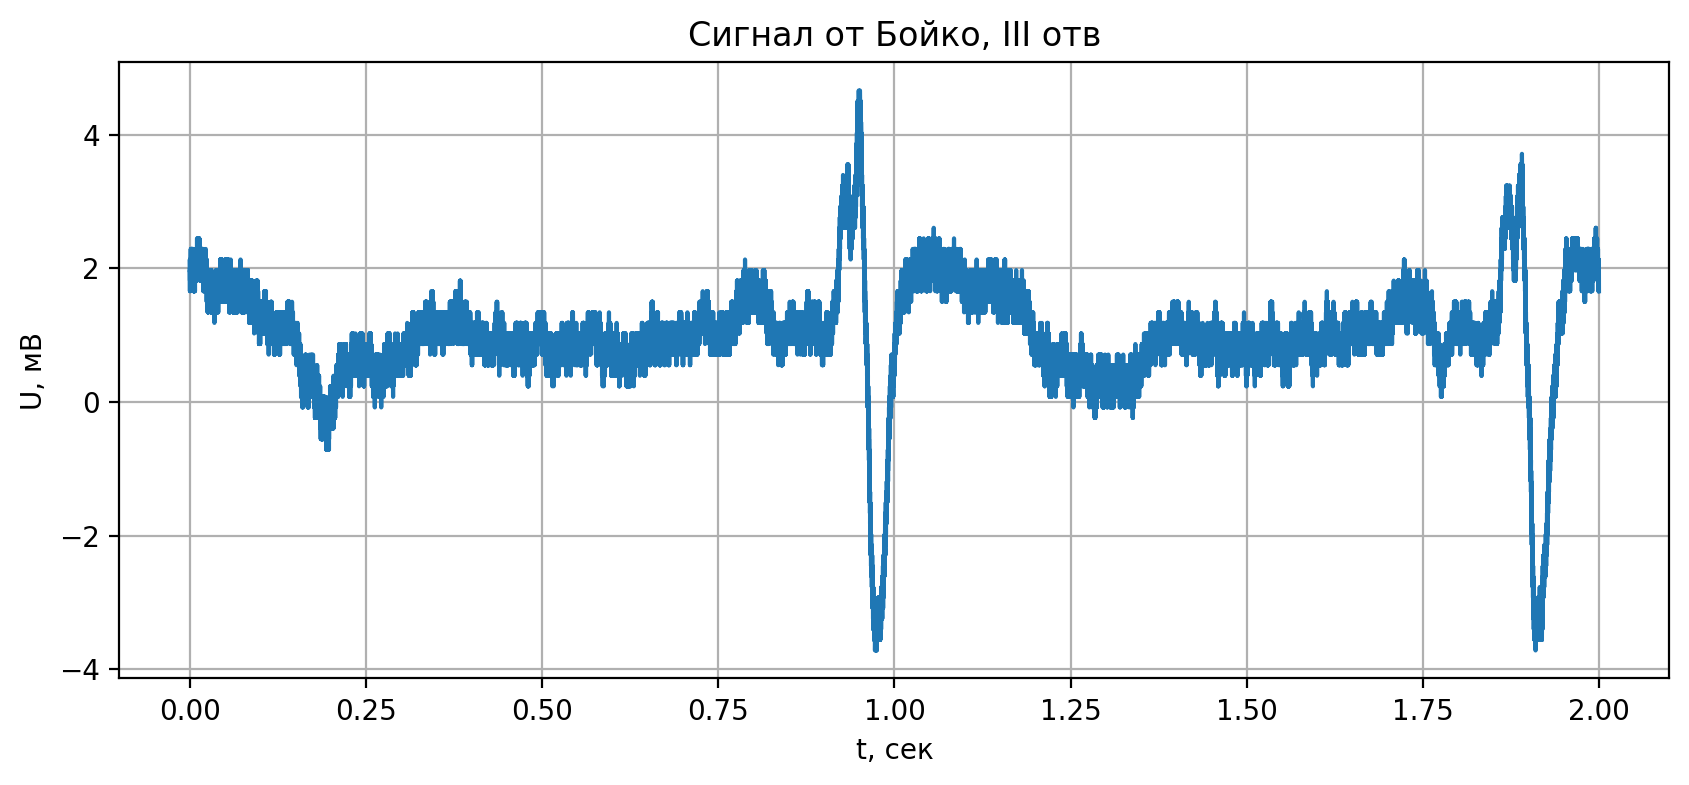

In [16]:
a = pd.read_csv(os.path.join(path, file_list[9]))
dT=2*10**(-6)
b=list(range(len(a)))
t=map(lambda x: x*dT, b)
plt.figure(figsize=(10, 4), dpi=200)
plt.plot(list(t), a)
plt.title('Сигнал от Бойко, III отв')    
plt.xlabel('t, сек')
plt.ylabel('U, мВ')
plt.grid()

## вЭКГ

### Подготовка данных для построения вЭКГ

Считаем данные в формате edf

In [2]:
file = "ЭКГ_Паша.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

Extracting EDF parameters from c:\Users\Pasha\Desktop\Мага БМТ1\4 term\КП Бойко\vector_ECG\ЭКГ_Паша.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [55]:
channels

['ECG I-Ref',
 'ECG II-Ref',
 'ECG III-Ref',
 'ECG AVR-Ref',
 'ECG AVL-Ref',
 'ECG AVF-Ref',
 'ECG V1-Ref',
 'ECG V2-Ref',
 'ECG V3-Ref',
 'ECG V4-Ref',
 'ECG V5-Ref',
 'ECG V6-Ref']

In [61]:
info

<Info | 7 non-empty values
 bads: []
 ch_names: ECG I-Ref, ECG II-Ref, ECG III-Ref, ECG AVR-Ref, ECG AVL-Ref, ...
 chs: 12 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2023-05-24 17:52:28 UTC
 nchan: 12
 projs: []
 sfreq: 250.0 Hz
>

In [3]:
fd = 250 # Частота дискретизации
raw_data.shape

(12, 7500)

In [4]:
df = pd.DataFrame(data=raw_data.T,    # values
...              index=range(raw_data.shape[1]),    # 1st column as index
...              columns=channels)  # 1st row as the column names
df

,ECG I-Ref,ECG II-Ref,ECG III-Ref,ECG AVR-Ref,ECG AVL-Ref,ECG AVF-Ref,ECG V1-Ref,ECG V2-Ref,ECG V3-Ref,ECG V4-Ref,ECG V5-Ref,ECG V6-Ref
0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,-0.00002,0.00002,0.00004,0.00000,-0.00003,0.00003,-0.00002,0.00001,0.00001,0.00000,0.00001,0.00002
2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00003,0.00002,0.00001,0.00001,0.00002,0.00002
3,-0.00001,0.00004,0.00005,-0.00001,-0.00004,0.00005,-0.00001,0.00005,0.00004,0.00003,0.00004,0.00004
4,0.00005,0.00006,0.00001,-0.00005,0.00001,0.00004,0.00002,0.00006,0.00005,0.00005,0.00006,0.00005
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.00000,0.00034,0.00034,-0.00017,-0.00017,0.00034,0.00010,-0.00003,0.00031,-0.00032,-0.00014,-0.00016
7496,0.00005,0.00038,0.00033,-0.00021,-0.00015,0.00036,0.00009,-0.00006,0.00030,-0.00034,-0.00016,-0.00018
7497,0.00006,0.00040,0.00034,-0.00023,-0.00014,0.00037,0.00014,-0.00004,0.00032,-0.00033,-0.00014,-0.00017
7498,-0.00001,0.00036,0.00037,-0.00017,-0.00020,0.00037,0.00012,-0.00004,0.00030,-0.00034,-0.00016,-0.00019


In [5]:
Ts = 1/fd
t = []
for i in range(raw_data.shape[1]):
    t.append(i*Ts)
max(t)

29.996000000000002

### Линейная интерполяция сигналов ЭКГ

(Catboost был обучен для частоты дискретизации 500 Гц, а полученные сигналы ЭКГ записаны с частотой дискретизации 250 Гц, поэтому необходимо сделать передискретизацию сигналов в 2 раза для получения частоты дискретизации 500 Гц)

In [28]:
#интерполяция на примере 1 сигнала

signal_temp=df.iloc[:,0]
signal_temp

0       0.00000
1      -0.00002
2       0.00000
3      -0.00001
4       0.00005
         ...   
7495    0.00000
7496    0.00005
7497    0.00006
7498   -0.00001
7499    0.00001
Name: ECG I-Ref, Length: 7500, dtype: float64

In [29]:
from scipy import interpolate

interpol_signal = interpolate.interp1d(t, signal_temp, kind = 'linear')
time1 = [i*Ts/2 for i in range((len(signal_temp)-1)*2)]
new_signal = interpol_signal(time1)
#print(type(new_signal))

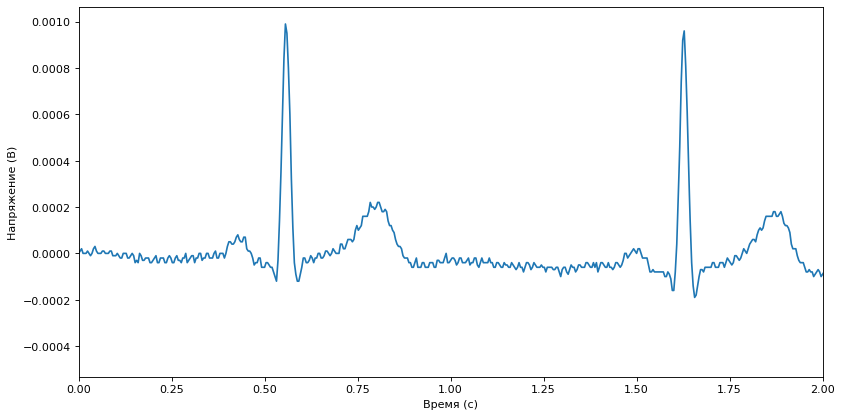

In [272]:
#проверка полученного сигнала

plt.figure(figsize=(12, 6), dpi=80)
plt.plot(time1, new_signal)
plt.xlabel('Время (с)')
plt.ylabel('Напряжение (В)')
plt.xlim([0, 2])
plt.show()

In [25]:
#проверка размерности полученного сигнала

new_signal.shape

(14998,)

In [7]:
#функция линейной интерполяции сигнала

def interpolate_df(df):
    
    interpol_df=pd.DataFrame()
    
    #задание нового времени
    time1 = [i*Ts/2 for i in range((df.shape[0]-1)*2)]
    df_time=pd.DataFrame(data=np.array(time1), columns=['time'])
    interpol_df=pd.concat([interpol_df, df_time], axis=1)
    
    #интерполяция сигнала ЭКГ с 12 отведений
    for i in range(df.shape[1]):
        signal_temp=df.iloc[:,i]
        interpol_signal = interpolate.interp1d(t, signal_temp, kind = 'linear')
        new_signal = interpol_signal(time1)
        temp_df=pd.DataFrame(data=np.array(new_signal), columns=[channels[i]])
        interpol_df=pd.concat([interpol_df, temp_df], axis=1)
    
    #время как индекс
    interpol_df=interpol_df.set_index('time')
    
    return interpol_df


In [8]:
df_new=interpolate_df(df)

### Нахождение пиков за счёт Catboost

In [9]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()      # parameters not required.
model.load_model('boosting_model_ECG.cbm');

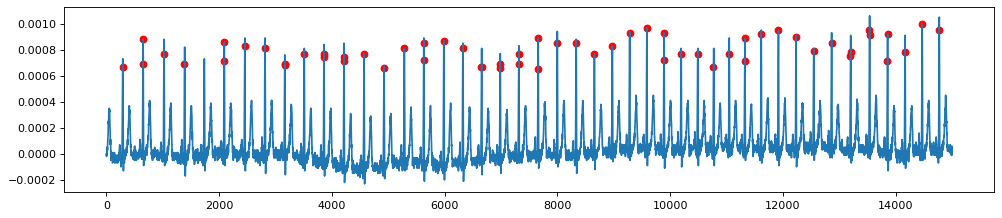

In [10]:
sig = np.array(df_new.iloc[:,0])
window = 200
dataset_check = []
middles = []
for i in range(0, len(sig)-window, 6):
    piece = sig[i:i+window] / np.max(np.abs(sig[i:i+window]))
    piece = piece - np.mean(piece)
    middle = (i + i + window) / 2
    middles.append(middle)
    dataset_check.append(piece)
df_check = pd.DataFrame(dataset_check)
test_preds = model.predict(df_check, prediction_type="Class")
peaks = np.where(test_preds>0)[0]

# Сделаем временный сигнал, который всегда имеет min значение = 0
temp_sig = sig
if min(sig) < 0:
    temp_sig = sig + abs(min(sig))
if min(sig) > 0:
    temp_sig = sig - abs(min(sig))

h = max(temp_sig)/1.5  # Выберем только те пики, которые >
true_peaks = []

for i in peaks:
    m = int(middles[i])
    if temp_sig[m]>h:
        true_peaks.append(i)


middles = np.asarray(middles)
figure(figsize=(15, 3), dpi=80)
plt.plot(sig)
plt.scatter(middles[true_peaks], [list(sig)[x] for x in list((middles[true_peaks]).astype(np.int64))], color='red')
#plt.xlim([0, 5000]);

Сделаем так, чтобы один кардиоцикл имел ровно 1 задетектированный пик. 
Условие будет такое: если между соседними пиками расстояние меньше чем 0.2 мс, тогда оставить надо как значение пика - среднее значение между точками

In [11]:
coordinates = middles[true_peaks].astype(np.int64)
coordinates = np.concatenate((coordinates, max(coordinates)+10000),axis=None)
final_coord = []
val_last = 0
data_points = []
for val in coordinates:
    if val - val_last > (0.2/Ts):
        if len(data_points)!=0:
            final_coord.append(int(np.array(data_points).mean()))
            data_points = []
    data_points.append(val)
    val_last = val

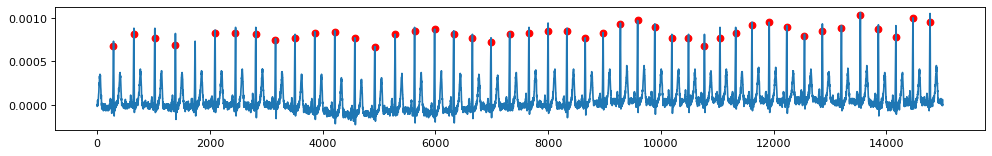

In [12]:
figure(figsize=(15, 2), dpi=80)
plt.plot(sig)
plt.scatter(final_coord, sig[final_coord], color='red')
#plt.xlim([0, 5000]);

Так как все сигналы записаны отновременно со всех отведений, поэтому эти же найденные координаты на 1 отведении можно перенести с легкостью на все остальные

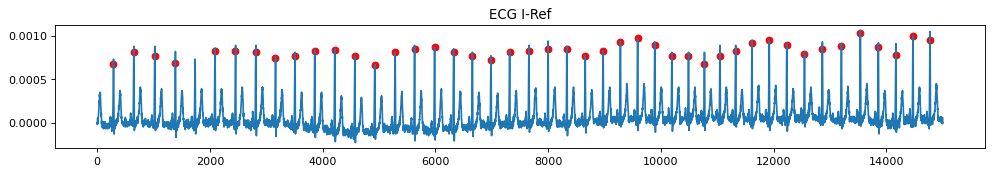

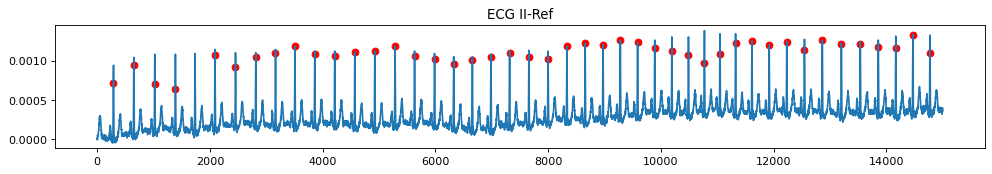

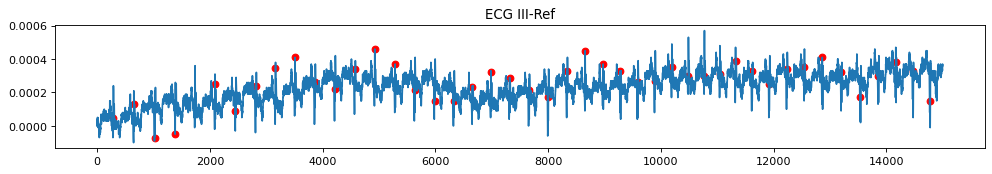

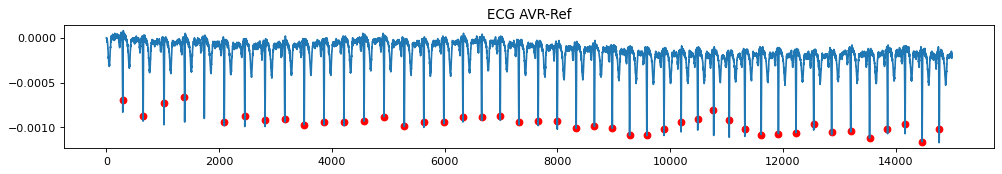

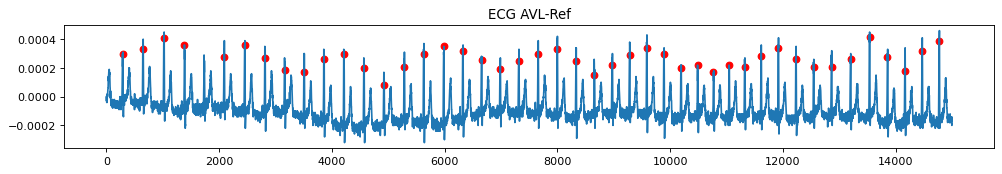

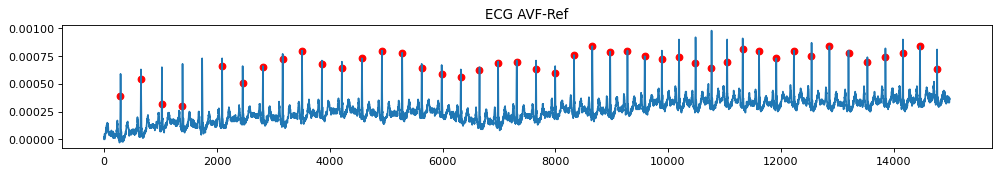

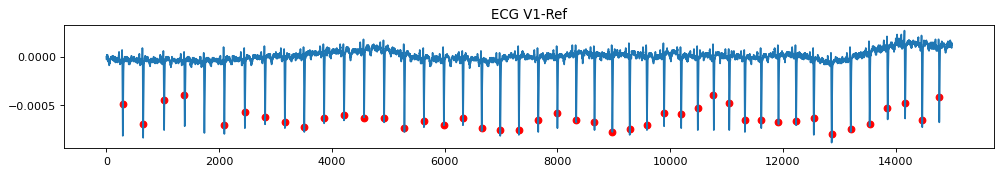

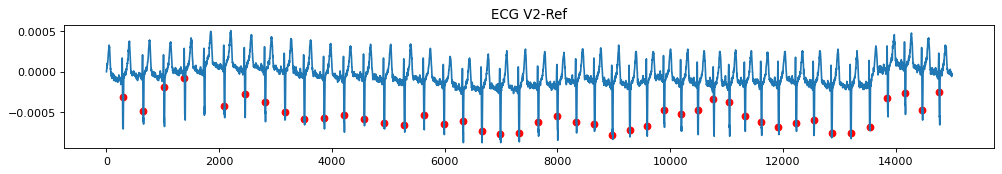

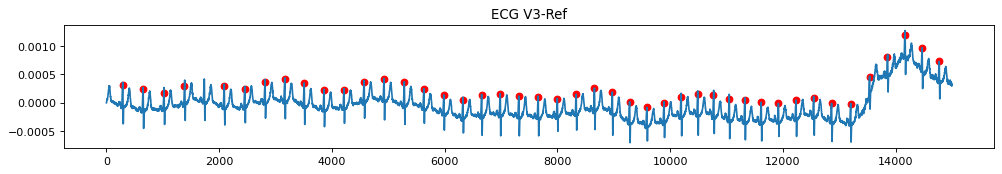

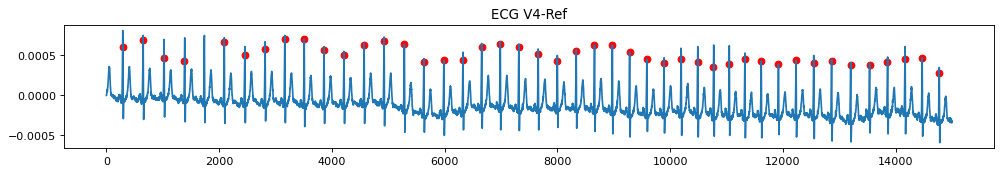

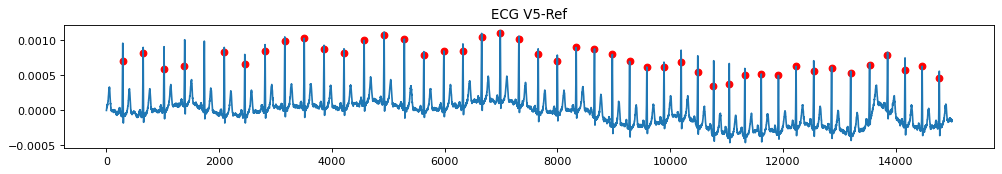

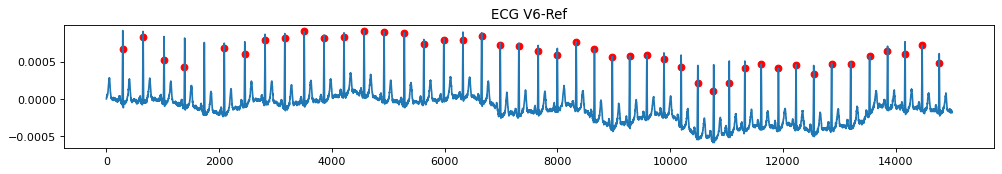

In [13]:
for graph in channels:
    sig = np.array(df_new[graph])
    figure(figsize=(15, 2), dpi=80)
    plt.plot(sig)
    plt.scatter(final_coord, sig[final_coord], color='red')
    plt.title(graph)
    #plt.xlim([0, 5000]);

### Поиск вЭКГ

[Статья, в которой есть формула для вычисления проекций диполя](article.pdf)

Нам требуется выделить 1 период кардиоцикла и для него расчитать. Я собираюсь взять 3 и 4 периоды

In [14]:
i = int(input('Введите значение с какого периода начать отсчет'))
print(f"Запрошен {i} период")
start = final_coord[i-1]
end = final_coord[i]

Запрошен 3 период


In [15]:
df_term = df_new.iloc[start:end,:]
df_term

,ECG I-Ref,ECG II-Ref,ECG III-Ref,ECG AVR-Ref,ECG AVL-Ref,ECG AVF-Ref,ECG V1-Ref,ECG V2-Ref,ECG V3-Ref,ECG V4-Ref,ECG V5-Ref,ECG V6-Ref
time,,,,,,,,,,,,
2.036,0.00077,0.000700,-0.000070,-0.000730,0.000410,0.000320,-0.000450,-0.000190,0.000180,0.000470,0.000590,0.000520
2.038,0.00082,0.000835,0.000015,-0.000820,0.000390,0.000430,-0.000540,-0.000310,0.000210,0.000540,0.000690,0.000630
2.040,0.00087,0.000970,0.000100,-0.000910,0.000370,0.000540,-0.000630,-0.000430,0.000240,0.000610,0.000790,0.000740
2.042,0.00087,0.001025,0.000155,-0.000940,0.000345,0.000595,-0.000680,-0.000500,0.000255,0.000655,0.000850,0.000790
2.044,0.00087,0.001080,0.000210,-0.000970,0.000320,0.000650,-0.000730,-0.000570,0.000270,0.000700,0.000910,0.000840
...,...,...,...,...,...,...,...,...,...,...,...,...
2.758,0.00013,0.000155,0.000025,-0.000140,0.000045,0.000095,0.000020,0.000280,0.000180,0.000105,0.000200,-0.000010
2.760,0.00019,0.000190,0.000000,-0.000190,0.000090,0.000100,-0.000010,0.000290,0.000210,0.000150,0.000250,0.000040
2.762,0.00030,0.000275,-0.000025,-0.000285,0.000155,0.000130,-0.000080,0.000235,0.000230,0.000210,0.000330,0.000115


In [16]:
# Задублируем первый отчет чтебы сделать график непрерывным:
df_row = df_new.iloc[start:start+1,:]
df_term = pd.concat([df_term, df_row])
df_row

,ECG I-Ref,ECG II-Ref,ECG III-Ref,ECG AVR-Ref,ECG AVL-Ref,ECG AVF-Ref,ECG V1-Ref,ECG V2-Ref,ECG V3-Ref,ECG V4-Ref,ECG V5-Ref,ECG V6-Ref
time,,,,,,,,,,,,
2.036,0.00077,0.0007,-0.00007,-0.00073,0.00041,0.00032,-0.00045,-0.00019,0.00018,0.00047,0.00059,0.00052


In [17]:
DI = df_term.iloc[:,0]
DII = df_term.iloc[:,1]
V1 = df_term.iloc[:,6]
V2 = df_term.iloc[:,7]
V3 = df_term.iloc[:,8]
V4 = df_term.iloc[:,9]
V5 = df_term.iloc[:,10]
V6 = df_term.iloc[:,11]

In [18]:
df_term['x'] = -(-0.172*V1-0.074*V2+0.122*V3+0.231*V4+0.239*V5+0.194*V6+0.156*DI-0.01*DII)
df_term['y'] = (0.057*V1-0.019*V2-0.106*V3-0.022*V4+0.041*V5+0.048*V6-0.227*DI+0.887*DII)
df_term['z'] = -(-0.229*V1-0.31*V2-0.246*V3-0.063*V4+0.055*V5+0.108*V6+0.022*DI+0.102*DII)

In [19]:
df_term

,ECG I-Ref,ECG II-Ref,ECG III-Ref,ECG AVR-Ref,ECG AVL-Ref,ECG AVF-Ref,ECG V1-Ref,ECG V2-Ref,ECG V3-Ref,ECG V4-Ref,ECG V5-Ref,ECG V6-Ref,x,y,z
time,,,,,,,,,,,,,,,
2.036,0.00077,0.000700,-0.000070,-0.000730,0.000410,0.000320,-0.000450,-0.000190,0.000180,0.000470,0.000590,0.000520,-0.000577,0.000444,-0.000265
2.038,0.00082,0.000835,0.000015,-0.000820,0.000390,0.000430,-0.000540,-0.000310,0.000210,0.000540,0.000690,0.000630,-0.000673,0.000554,-0.000343
2.040,0.00087,0.000970,0.000100,-0.000910,0.000370,0.000540,-0.000630,-0.000430,0.000240,0.000610,0.000790,0.000740,-0.000769,0.000664,-0.000422
2.042,0.00087,0.001025,0.000155,-0.000940,0.000345,0.000595,-0.000680,-0.000500,0.000255,0.000655,0.000850,0.000790,-0.000818,0.000714,-0.000462
2.044,0.00087,0.001080,0.000210,-0.000970,0.000320,0.000650,-0.000730,-0.000570,0.000270,0.000700,0.000910,0.000840,-0.000868,0.000763,-0.000503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.760,0.00019,0.000190,0.000000,-0.000190,0.000090,0.000100,-0.000010,0.000290,0.000210,0.000150,0.000250,0.000040,-0.000136,0.000106,0.000107
2.762,0.00030,0.000275,-0.000025,-0.000285,0.000155,0.000130,-0.000080,0.000235,0.000230,0.000210,0.000330,0.000115,-0.000218,0.000157,0.000059
2.764,0.00041,0.000360,-0.000050,-0.000380,0.000220,0.000160,-0.000150,0.000180,0.000250,0.000270,0.000410,0.000190,-0.000301,0.000208,0.000011


<image src="https://cf.ppt-online.org/files/slide/j/jwUOHvuLkin8pdx01KmTBc7YRIDs5JZgF9tXyN/slide-37.jpg">

[]

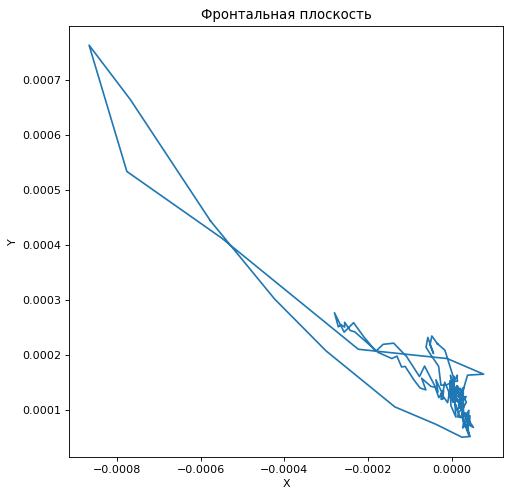

In [20]:
plt.figure(figsize=(7, 7), dpi=80)
plt.plot(df_term.x,df_term.y)
plt.title('Фронтальная плоскость')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot()

[]

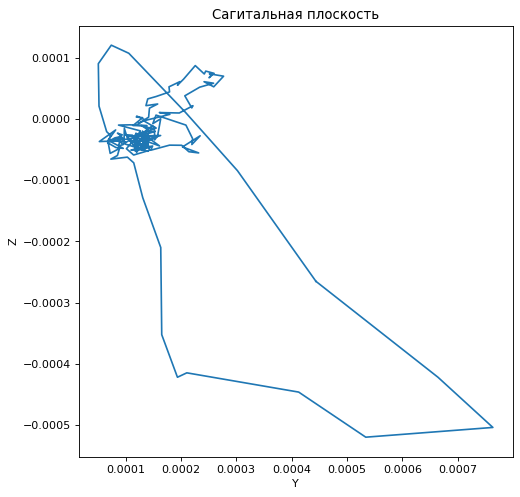

In [21]:
plt.figure(figsize=(7, 7), dpi=80)
plt.plot(df_term.y,df_term.z)
plt.title('Сагитальная плоскость')
plt.xlabel('Y')
plt.ylabel('Z')
plt.plot()

[]

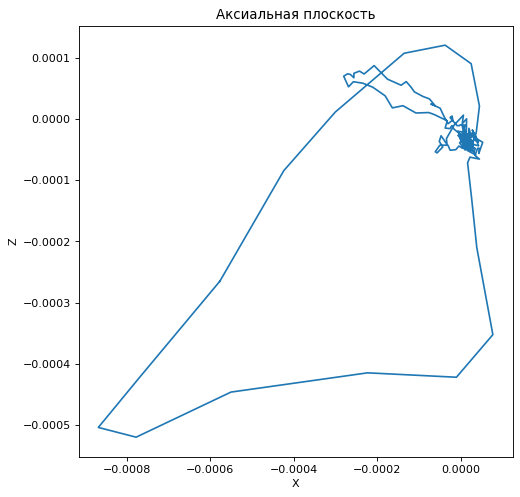

In [22]:
plt.figure(figsize=(7, 7), dpi=80)
plt.plot(df_term.x, df_term.z)
plt.title('Аксиальная плоскость')
plt.xlabel('X')
plt.ylabel('Z')
plt.plot()

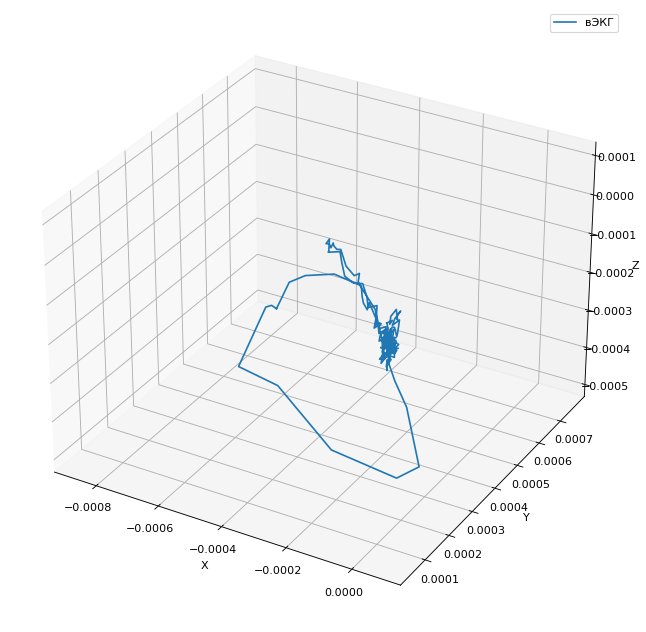

In [23]:
ax = plt.figure(figsize=(10, 10), dpi=80).add_subplot(projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.plot(df_term.x,df_term.y,df_term.z, label='вЭКГ')
ax.legend()

plt.show()

## Определение угла QRST

Угол QRST - это угол между вектором, представляющим среднюю электродвижущую силу QRS, и вектором, представляющим среднюю электродвижущую силу волны ST-T
(Источник: https://meduniver.com/Medical/cardiologia/1458.html MedUniver)

Поэтому нужно найти середины временных интервалов QRS и ST-T, и для 2 полученных значений времени  определить координаты векторов ЭДС.
Для этого нужно определить на графике ЭКГ(I отведение) координату X для 3 точек, которые пользователь находит по интерактивному графику:

1. R-зубца (предполагается, что это середина интервала QRS)
2. Начала интервала ST
3. Конца интервала T

Полученные координаты следует внести отдельно (например, ввод с клавиатуры)

In [24]:
# *** График ЭКГ в интерактивном режиме *** #

#!pip install cufflinks plotly

# Стандартное импортирование plotly
from plotly.offline import iplot

# Использование cufflinks в офлайн-режиме
import cufflinks
cufflinks.go_offline()

# Настройка глобальной темы cufflinks
cufflinks.set_config_file(world_readable=True, theme='pearl', offline=True)

In [25]:
df_new.iloc[start:end,1].iplot(xTitle='Seconds', yTitle='U, mV', title=channels[0])

In [ ]:
time1 = [i*Ts/2 for i in range((df.shape[0]-1)*2)]

In [30]:
#введение полученных координат

t_R=2.044 #время R-зубца
t_ST_start=2.080 #время начала интервала ST
t_T_end=2.356 #время окончания Т-зубца

t1=t_R #время для усреднённого вектора интервала QRS 
t2=(t_T_end+t_ST_start)/2

t_d=Ts

if (t2*1000) % (time1[1]*1000) != 0.0:
   t2=(t_T_end+t_ST_start)/2 + 0.001
t2

2.218

Нахождение координат усреднённых векторов для интервала QRS и ST-T 

In [31]:
df_angle = df_term[(df_term.index == t1) | (df_term.index == t2)]
df_angle

,ECG I-Ref,ECG II-Ref,ECG III-Ref,ECG AVR-Ref,ECG AVL-Ref,ECG AVF-Ref,ECG V1-Ref,ECG V2-Ref,ECG V3-Ref,ECG V4-Ref,ECG V5-Ref,ECG V6-Ref,x,y,z
time,,,,,,,,,,,,,,,
2.044,0.00087,0.001080,0.000210,-0.00097,0.000320,0.000650,-0.00073,-0.00057,0.00027,0.00070,0.00091,0.00084,-0.000868,0.000763,-0.000503
2.218,0.00009,0.000195,0.000105,-0.00014,-0.000015,0.000155,-0.00002,0.00015,0.00003,0.00007,0.00012,0.00004,-0.000061,0.000151,0.000021


In [32]:
x1=df_angle['x'].iloc[0]
y1=df_angle['y'].iloc[0]

x2=df_angle['x'].iloc[1]
y2=df_angle['y'].iloc[1]

#print(x1,y1,x2,y2)

Нахождение косинуса угла между векторами

In [33]:
cos_alpha=(x1*x2+y1*y2)/(((x1**2+y1**2)**0.5)*((x2**2+y2**2)**0.5))
cos_alpha

0.8932098994082263

Определение угла

In [34]:
from math import acos, pi

angle=acos(cos_alpha)*180/pi
angle

26.72058521926947

## Нахождение площади петли во фронтальной плоскости (xOy)

In [52]:
x = np.array(df_term.x)
y = np.array(df_term.y)

#удаление последнего значения, которое равно первому
x=x[:-1]
y=y[:-1]

In [49]:
#функция для расчёта площади полигона (Shoelace formula)

# Источники: https://en.wikipedia.org/wiki/Shoelace_formula
# https://stackoverflow.com/questions/24467972/calculate-area-of-polygon-given-x-y-coordinates

def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

In [54]:
print(PolyArea(x,y))

1.5071465224999277e-08
